In [ ]:
import os
import cv2
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

current_path = os.getcwd()
print(current_path)
project_root_path = os.path.abspath(os.path.join(current_path, '..'))
print(project_root_path)

if project_root_path not in sys.path:
    sys.path.append(project_root_path)
    
from data.Dataset_loader import load_dataset as dataset_loader
from models.forward import Forward as fw

/Users/ghoziwaridi/PEMOGRAMAN/Python/Deep_learning/CNN/Weed_detection/Skenario
/Users/ghoziwaridi/PEMOGRAMAN/Python/Deep_learning/CNN/Weed_detection


(4160, 2773, 3)


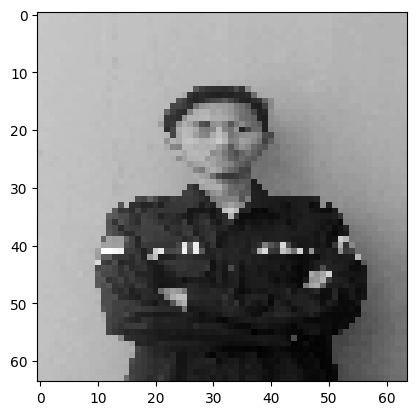

In [77]:
path = "/Users/ghoziwaridi/PEMOGRAMAN/Python/Deep_learning/CNN/Weed_detection/Dataset/ghozi.jpg"

img = cv2.imread(path)
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (64, 64))
plt.imshow(img, cmap="gray")



# Pembuatan Kernel yang akan digunakan untuk filter pada CNN

In [78]:
# Sobel filter (deteksi tepi horizontal)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Sobel filter (deteksi tepi vertikal)
sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Prewitt filter (deteksi tepi horizontal)
prewitt_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# Prewitt filter (deteksi tepi vertikal)
prewitt_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

# Gaussian blur (blur/lembutkan gambar)
gaussian = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Laplacian filter (deteksi tepi)
laplacian = np.array([
    [0,  1, 0],
    [1, -4, 1],
    [0,  1, 0]
])

# Sharpen filter (menajamkan gambar)
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Emboss filter (efek timbul)
emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

# Skenario Untuk Operasi dari Convulational Neural Networks

In [79]:
def conv_layer(image, kernel, stride=1):
        
    image  = np.array(image)
    x, y = image.shape
        
    kernel = np.array(kernel)
    x_kernel, y_kernel = kernel.shape
        
    output = np.zeros(((x - x_kernel) // stride + 1, (y - y_kernel) // stride + 1))
## Membuat sebuah ukuran output dengan menyesuaikan dengan ukuran kernel dan berapa langkah yang akan di ambil
    out_h = output.shape[1] # kita mengambil tinggi dari output untuk melakukan perulangan dan supaya sesuai dengna ukuran hasil dari output nantinnya
    out_w = output.shape[0]
        
    for i in range(out_w):
        for j  in range(out_h):
            point_h = i * stride
            point_w = j * stride
            patch = image[point_h:point_h + kernel.shape[0], point_w:point_w + kernel.shape[1]] ## Gambar yang di ambil sesuai dengan ukuran kernel unutk melakuakn operasi convulation
            output[i, j] += np.sum(np.dot(patch, kernel)) 
                
    return output

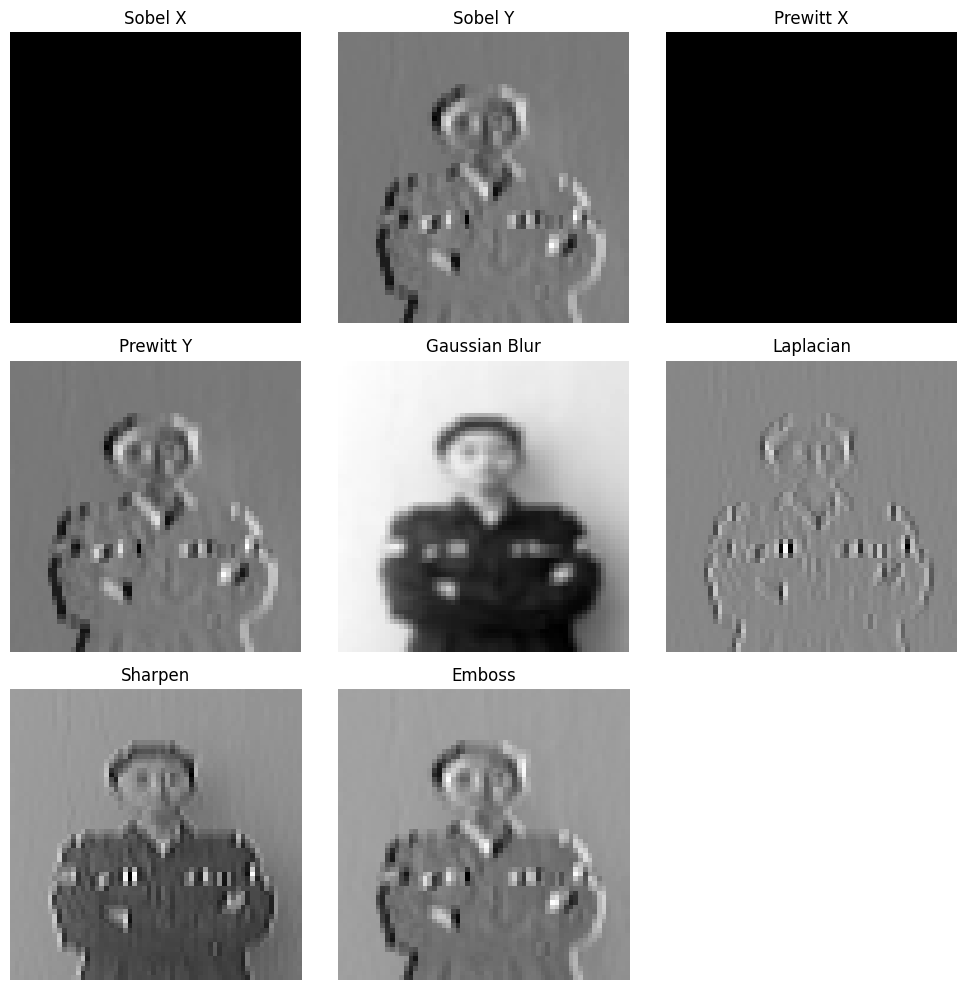

In [80]:
output_sobel_x = conv_layer(img, sobel_x, stride=1)
output_sobel_y = conv_layer(img, sobel_y, stride=1)
output_prewit_x = conv_layer(img, prewitt_x, stride=1)
output_prewit_y = conv_layer(img, prewitt_y, stride=1)
output_gaussian = conv_layer(img, gaussian, stride=1)
output_laplicia = conv_layer(img, laplacian, stride=1)
output_sharpen = conv_layer(img, sharpen, stride=1)
output_emboss = conv_layer(img, emboss, stride=1)


plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(output_sobel_x, cmap="gray")
plt.title("Sobel X")
plt.axis("off")
plt.subplot(3, 3, 2)
plt.imshow(output_sobel_y, cmap="gray")
plt.title("Sobel Y")
plt.axis("off")
plt.subplot(3, 3, 3)
plt.imshow(output_prewit_x, cmap="gray")
plt.title("Prewitt X")
plt.axis("off")
plt.subplot(3, 3, 4)
plt.imshow(output_prewit_y, cmap="gray")
plt.title("Prewitt Y")
plt.axis("off")
plt.subplot(3, 3, 5)
plt.imshow(output_gaussian, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")
plt.subplot(3, 3, 6)
plt.imshow(output_laplicia, cmap="gray")
plt.title("Laplacian")
plt.axis("off")
plt.subplot(3, 3, 7)
plt.imshow(output_sharpen, cmap="gray")
plt.title("Sharpen")
plt.axis("off")
plt.subplot(3, 3, 8)
plt.imshow(output_emboss, cmap="gray")
plt.title("Emboss")
plt.axis("off")
plt.tight_layout()
plt.show()


## ReLU Activation Function

In [81]:
def relu(x):
    return np.maximum(0, x)

In [82]:
relu_sobel_x = relu(output_sobel_x)
relu_sobel_y = relu(output_sobel_y)
relu_prewit_x = relu(output_prewit_x)
relu_prewit_y = relu(output_prewit_y)
relu_gaussian = relu(output_gaussian)
relu_laplicia = relu(output_laplicia)
relu_sharpen = relu(output_sharpen)
relu_emboss = relu(output_emboss)



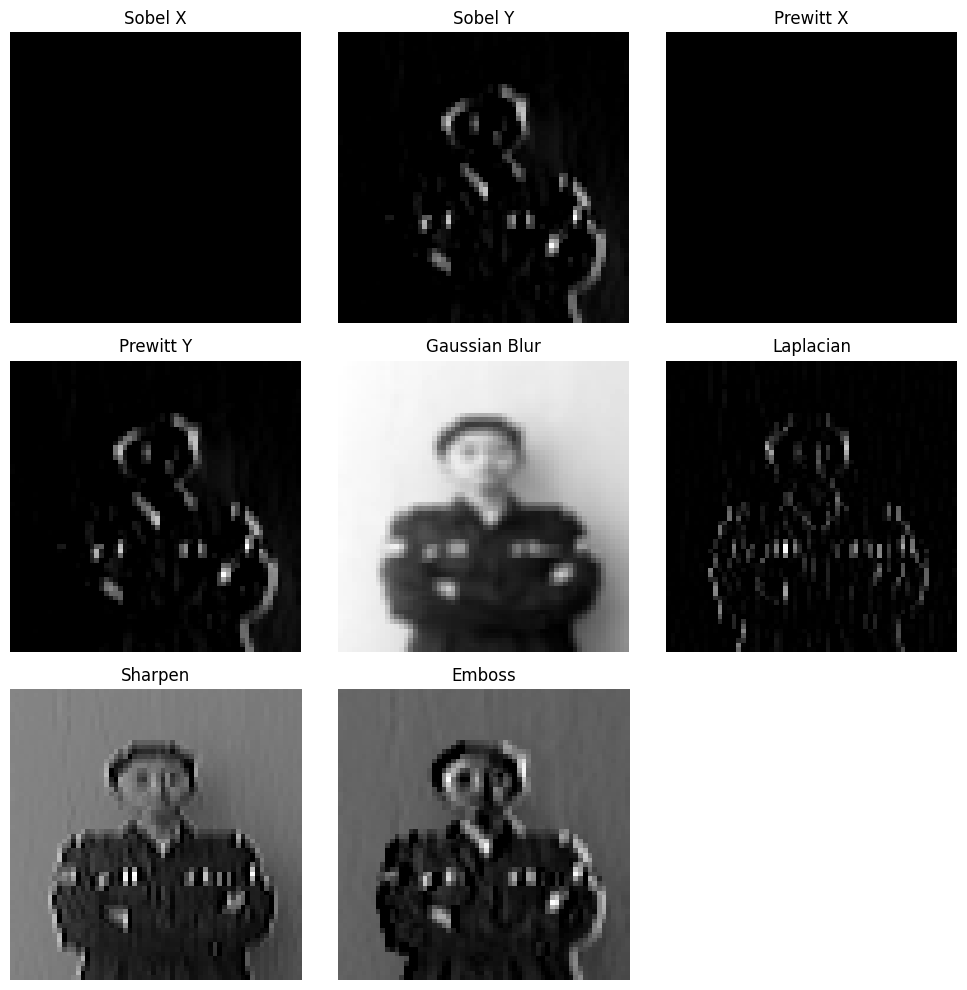

In [83]:

plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(relu_sobel_x, cmap="gray")
plt.title("Sobel X")
plt.axis("off")
plt.subplot(3, 3, 2)
plt.imshow(relu_sobel_y, cmap="gray")
plt.title("Sobel Y")
plt.axis("off")
plt.subplot(3, 3, 3)
plt.imshow(relu_prewit_x, cmap="gray")
plt.title("Prewitt X")
plt.axis("off")
plt.subplot(3, 3, 4)
plt.imshow(relu_prewit_y, cmap="gray")
plt.title("Prewitt Y")
plt.axis("off")
plt.subplot(3, 3, 5)
plt.imshow(relu_gaussian, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")
plt.subplot(3, 3, 6)
plt.imshow(relu_laplicia, cmap="gray")
plt.title("Laplacian")
plt.axis("off")
plt.subplot(3, 3, 7)
plt.imshow(relu_sharpen, cmap="gray")
plt.title("Sharpen")
plt.axis("off")
plt.subplot(3, 3, 8)
plt.imshow(relu_emboss, cmap="gray")
plt.title("Emboss")
plt.axis("off")
plt.tight_layout()
plt.show()

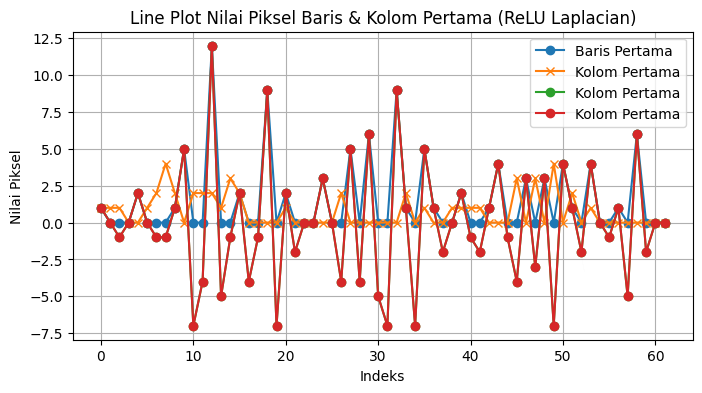

In [84]:
plt.figure(figsize=(8, 4))
plt.plot(relu_laplicia[0], marker='o', label='Baris Pertama')
plt.plot(relu_laplicia[:, 0], marker='x', label='Kolom Pertama')
plt.plot(output_laplicia[0], marker='o', label='Kolom Pertama')
plt.plot(output_laplicia[0], marker='o', label='Kolom Pertama')
plt.title("Line Plot Nilai Piksel Baris & Kolom Pertama (ReLU Laplacian)")
plt.xlabel("Indeks")
plt.ylabel("Nilai Piksel")
plt.legend()
plt.grid(True)
plt.show()

# MaxxPooling

In [103]:
def maxPooling(image, pool_size=(2, 2), stride=2):
    image = np.array(image)
    x, y = image.shape
        
    output = np.zeros(((x - pool_size[0]) // stride + 1, (y - pool_size[1]) // stride + 1))
    out_h = output.shape[0]
    out_w = output.shape[1]
        
    for i in range(out_w):
        for j in range(out_h):
            point_w = i * stride
            point_h = j * stride
            patch = image[point_w:point_w + pool_size[0], point_h:point_h + pool_size[1]]
            output[i, j] = np.max(patch)
                
    return output

(31, 31)


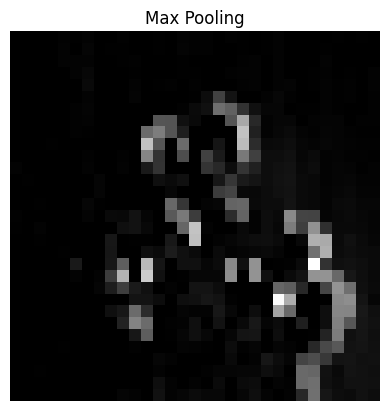

In [108]:

output_maxPooling = maxPooling(relu_prewit_y, pool_size=(2, 2), stride=2)
print(output_maxPooling.shape)

plt.imshow(output_maxPooling, cmap="gray")
plt.title("Max Pooling")
plt.axis("off")
plt.show()

# Fully Connected Layer

In [ ]:
def fully_connected_layer(image, weights, bias):
    image = np.array(image).flatten()  
    output = np.dot(image, weights) + bias
    return output